In [2]:
# Load packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
import pandas as pd
pd.set_option('max_rows', 6)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import cmocean.cm as cmo
import csv
import statsmodels.api as sm
from scipy import stats

x = "Year CE"
deg = u'SST [\u00B0C]'

In [4]:
# load paleoclimate datasets
# R code
# Richey 2009; Gulf of Mexico
# fisk <- read.csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-fisk.csv', header = TRUE)
# garrison <- read.csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-garrison.csv', header = TRUE)

# Richey 2007; Gulf of Mexico
richey2007 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2007.csv')
richey2007.rename(columns={"Cal yr B.P.":"yrBP", "Core Depth (mm)":"depth (mm)", "% G. sacculifer":"percent gsacc"}, inplace = True)
richey2007["yrAD"] = 1950 - richey2007["yrBP"]

# Richey 2009; Gulf of Mexico
fisk = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-fisk.csv')
fisk.rename(columns={"Core Depth (mm)":"depth (mm)"}, inplace = True)
fisk["yrAD"] = 1950 - fisk["yrBP"]

garrison = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/richey2009-garrison.csv')
garrison.rename(columns={"Core Depth (mm)":"depth (mm)"}, inplace = True)
garrison["yrAD"] = 1950 - garrison["yrBP"]

# Saenger 2009; Bahamas SST
saenger2009 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/bahamas2009sst.csv')
saenger2009["yrBP"] = 1950 - saenger2009["yrAD"]

# Saenger 2011; Carolina slope
core1 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/saenger2011_core1.csv')
core1.rename(columns={"Year(AD)":"yrAD"}, inplace = True)
core1["yrBP"] = 1950 - core1["yrAD"]

core2 = pd.read_csv('~/Documents/GitHub/data/paleoclimate_data/saenger2011_core2.csv')
core2.rename(columns={"Year(AD)":"yrAD"}, inplace = True)
core2["yrBP"] = 1950 - core2["yrAD"]

# Keigwin 1996; Bermuda rise
k4a = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/bc004a-tab.txt', comment = "#", sep = '\t', header = 0)
k4a.rename(columns={"yrBP ":"yrBP"}, inplace = True)
k4a["yrAD"] = 1950 - k4a["yrBP"]

k4d = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/bc004d-tab.txt', comment = "#", sep = '\t', header = 0)
k4d.rename(columns={"yrBP ":"yrBP"}, inplace = True)
k4d["yrAD"] = 1950 - k4d["yrBP"]

k4d_rub = k4d[k4d["carb%"] == -999]
k4d_carb = k4d[k4d["d18Og.rub"] == -999]

lundmc62 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/lund2006mc62.csv', comment = "#", sep = ',', header = 0)
lundmc62['yrAD'] = 1950 - lundmc62['CalAge1']

lawdomeco2 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/law2018d13c-co2.txt', comment = "#", sep = '\t', header = 0)
lawdomeco2['yrAD'] = lawdomeco2['age_CO2']

lawdomeco2 = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/law2018d13c-co2.txt', comment = "#", sep = '\t', header = 0)
lawdomeco2['yrAD'] = lawdomeco2['age_CO2']

wurtzel = pd.read_table('~/Documents/GitHub/data/paleoclimate_data/wurtzel2013-composite.txt', comment = "#", sep = '\t', header = 0)
wurtzel['yrAD'] = wurtzel['age_AD']

# print(richey2007)
# print(fisk)
# print(garrison)
# print(saenger2009)
# print(core1)
# print(core2)
# print(k4a)
# print(k4d)

In [5]:
wurtzel

,age_AD,Mg/Ca-g.rub-p.IA,sst-mg/ca-g.rub-p,Mg/Ca-g.bull.IA,sst-mg/ca-g.bull,yrAD
0,-60,4.4658,NaN,6.3172,NaN,-60
1,-59,4.5094,NaN,6.2373,NaN,-59
2,-58,4.5530,NaN,6.1574,NaN,-58
...,...,...,...,...,...,...
2066,2006,5.1355,29.1327,5.1544,27.8442,2006
2067,2007,5.2686,29.1444,5.0205,27.5581,2007
2068,2008,4.1541,28.2011,4.8866,27.2643,2008


No handles with labels found to put in legend.


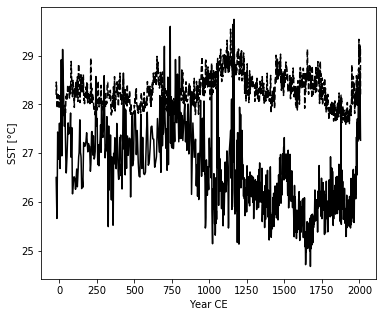

In [6]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

plt.plot('yrAD', 'sst-mg/ca-g.rub-p', data=wurtzel, label = "", color = "k", linestyle = "--")
plt.plot('yrAD', 'sst-mg/ca-g.bull', data=wurtzel, label = "", color = "k", linestyle = "-")

# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel("Year CE")

# Draw y label
ax.set_ylim(ax.get_ylim())
ax.set_ylabel(deg)

# Set limits


ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()

# Legend
plt.legend(frameon=False)

# Save figure
plt.savefig('fig_sst_reconstructions_recent.png', dpi=300, bbox_inches='tight')

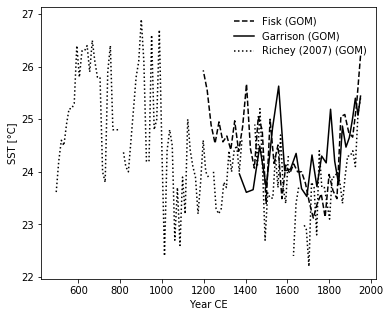

In [13]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

plt.plot('yrAD', 'SST', data=fisk, label = "Fisk (GOM)", color = "k", linestyle = "--")
plt.plot('yrAD', 'SST', data=garrison, label = "Garrison (GOM)", color = "k", linestyle = "-")
plt.plot('yrAD', 'SST', data=richey2007, label = "Richey (2007) (GOM)", color = "k", linestyle = ":")


# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel("Year CE")

# Draw y label
ax.set_ylim(ax.get_ylim())
ax.set_ylabel(deg)

# Set limits


ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()

# Legend
plt.legend(frameon=False)

# Save figure
plt.savefig('fig_sst_reconstructions_recent.png', dpi=300, bbox_inches='tight')

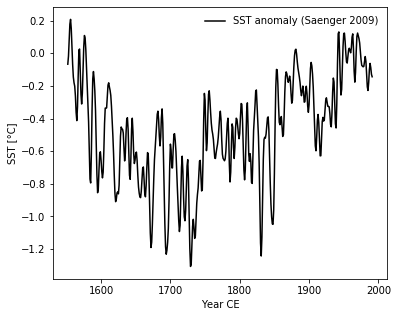

In [5]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

plt.plot('yrAD', 'SST_anomaly', data=saenger2009, color = "k", linestyle = "-", label = "SST anomaly (Saenger 2009)")
# plt.plot('yrAD', 'lower_se', data=saenger2009, color = "k", linestyle = "--")
# plt.plot('yrAD', 'upper_se', data=saenger2009, color = "k", linestyle = "--")

# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel("Year CE")

# Draw y label
ax.set_ylim(ax.get_ylim())
ax.set_ylabel(deg)

# Set limits


ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()

# Legend
plt.legend(frameon=False)

# Save figure
plt.savefig('fig_sst_reconstructions_bahamas.png', dpi=300, bbox_inches='tight')

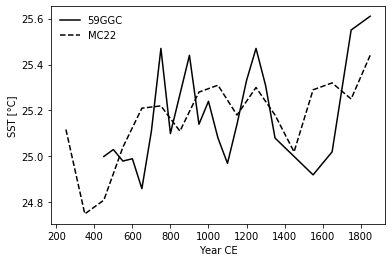

In [6]:
# Saenger 2011 cores

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot('yrAD', 'SST(Anand)', data=core1, label="59GGC", color = 'k', linestyle="-")
# plt.plot('yrAD', "upper", data=core1, color = 'k', linestyle = ":")
# plt.plot('yrAD', "lower", data=core1, color = 'k', linestyle = ":")
plt.plot('yrAD', 'SST(Anand)', data=core2, label="MC22", color = 'k', linestyle = "--")

ax.set_xlabel("Year CE")
ax.set_ylabel(deg)

plt.legend(frameon=False)

Text(0, 0.5, 'SST [°C]')

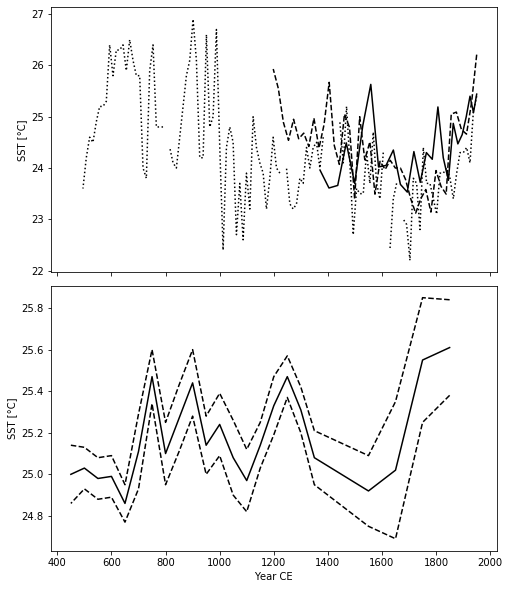

In [7]:
core1["upper"] = core1["SST(Anand)"] + core1["sst_se"]
core1["lower"] = core1["SST(Anand)"] - core1["sst_se"]

fig, axs = plt.subplots(2, sharex = True, 
                        gridspec_kw={'hspace': 0.05},
                       figsize = (8,10))
# fig.suptitle('Vertically stacked subplots')

axs[0].plot('yrAD', 'SST', data=fisk, label = "Fisk", color = "k", linestyle = "--")
axs[0].plot('yrAD', 'SST', data=garrison, label = "Garrison", color = "k", linestyle = "-")
axs[0].plot('yrAD', 'SST', data=richey2007, label = "Richey (2007)", color = "k", linestyle = ":")

axs[1].plot('yrAD', 'SST(Anand)', data=core1, label="59GGC", color = 'k', linestyle="-")
axs[1].plot('yrAD', "upper", data=core1, color = 'k', linestyle = "--")
axs[1].plot('yrAD', "lower", data=core1, color = 'k', linestyle = "--")


# Draw x label
axs[1].set_xlabel("Year CE")

# Draw y label
axs[0].set_ylabel(deg)
axs[1].set_ylabel(deg)


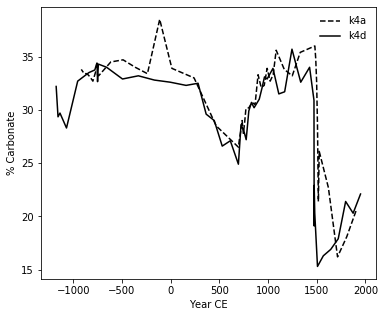

In [8]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

plt.plot('yrAD', 'carb%', data=k4a, label = "k4a", color = "k", linestyle = "--")
plt.plot('yrAD', 'carb%', data=k4d_carb, label = "k4d", color = "k", linestyle = "-")

# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel("Year CE")

# Draw y label
ax.set_ylim(ax.get_ylim())
ax.set_ylabel("% Carbonate")

# Set limits
ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()

# Legend
plt.legend(frameon=False)

# Save figure
plt.savefig('fig_keigwin_1996.png', dpi=300, bbox_inches='tight')

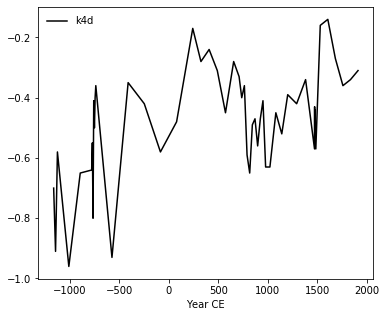

In [18]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

# plt.plot('yrAD', 'd18Og.rub', data=k4a, label = "k4a", color = "k", linestyle = "--")
plt.plot('yrAD', 'd18Og.rub', data=k4d_rub, label = "k4d", color = "k", linestyle = "-")

# Draw x label
ax.xaxis.set_label_position('top') # this moves the label to the top
ax.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax.set_xlabel("Year CE")

# Draw y label
ax.set_ylim(ax.get_ylim())
# ax.set_ylabel("% Carbonate")

# Set limits
ax.xaxis.set_label_position('bottom') 
ax.xaxis.tick_bottom()

# Legend
plt.legend(frameon=False)

# Save figure


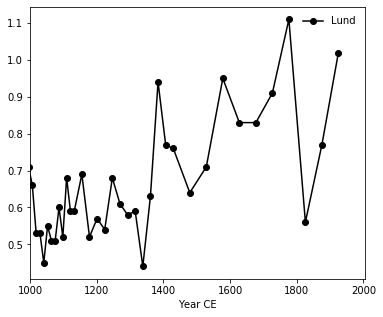

In [17]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.plot('yrAD', 'd18Ow', data=lundmc62, color = 'k', linestyle="-", label = 'Lund', marker = 'o')

# Set limits
ax.set_xlim(1000, 2005)
# ax.set_ylim(3.5, 5)

# Draw x label
ax.set_xlabel("Year CE")

# Legend
ax.legend(frameon=False)

# Draw y label
# ax.set_ylabel(deg)

# Save figure
# plt.savefig('fig_sst_reconstructions_recent.png', dpi=300, bbox_inches='tight')

In [11]:
lawdomeco2

,SampleID,age_ice,age_CO2,d13CO2,d13CO2err,yrAD
0,DE08-2 0,firn,1993,-7.84,0.02,1993
1,DSSW20K 37.8,firn,1992,-7.85,0.04,1992
2,DE08-2 10,firn,1991,-7.80,0.02,1991
...,...,...,...,...,...,...
102,DSS 039,1191,1251,-6.55,0.05,1251
103,DSS 042,1039,1099,-6.55,0.07,1099
104,DSS 038,959,1019,-6.54,0.05,1019


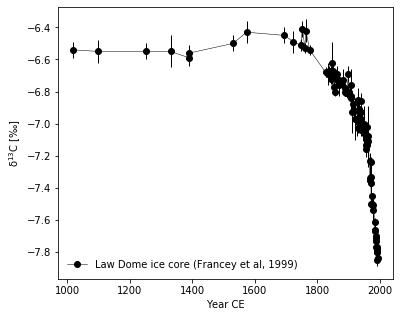

In [30]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.plot('yrAD', 'd13CO2', data=lawdomeco2, marker = 'o', color = 'k', linestyle="-", 
        label = 'Law Dome ice core (Francey et al, 1999)',
        linewidth= 0.5)

# Set limits
# ax.set_xlim(1000, 2005)
# ax.set_ylim(3.5, 5)

# Draw x label
ax.set_xlabel("Year CE")
ax.set_ylabel(r'$\mathrm{\delta}^{13}$C ['u"\u2030]",)

plt.errorbar(lawdomeco2['yrAD'],lawdomeco2['d13CO2'], yerr=[lawdomeco2['d13CO2err'],lawdomeco2['d13CO2err']],
            fmt='o', color = 'black', linewidth = 1, markerfacecolor = 'None', markeredgecolor = 'None')

# Legend
ax.legend(frameon=False, loc = 3)

# Draw y label
# ax.set_ylabel(deg)

# Save figure
plt.savefig('fig_d13c_co2_francey1999.png', dpi=300, bbox_inches='tight')

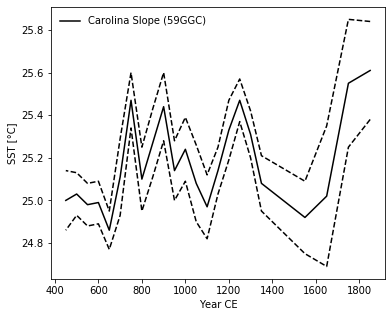

In [22]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

ax.plot('yrAD', 'SST(Anand)', data=core1, label="Carolina Slope (59GGC)", color = 'k', linestyle="-")
ax.plot('yrAD', "upper", data=core1, color = 'k', linestyle = "--", label = "")
ax.plot('yrAD', "lower", data=core1, color = 'k', linestyle = "--", label = "")

ax.set_ylabel(deg)
ax.set_xlabel("Year CE")

plt.legend(frameon=False)

plt.savefig('fig_carolinaslope_saenger2011.png', dpi=300, bbox_inches='tight')